# 3b. Fitting carbonate and SO$_2$ peaks
- This notebook shows how to fit secondary peaks, such as carbonate and S-rich phases in vapour bubbles and fluid inclusions

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
from tqdm import tqdm
pf.__version__

'0.0.91'

In [82]:
# Here, we are loading in the settings files from Step1. If all you want to do is find secondary phases, paste that code here
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

In [83]:
exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Spec', 'CRR', 'secphase','diad']
Diad_Files=pf.get_files(path=spectra_path, file_ext=spectra_file_ext, exclude_str=exclude_str)
print(Diad_Files)
File_df=pd.DataFrame(data={'filename': Diad_Files})

['01 FG04-A1-4.txt', '02 FG04-A1-16.txt', '04 FG04-A1-16_am.txt', '05 FG04-A1-4_am.txt', '07 K24_21_FIA.txt', '08 K24_22_FIA.txt', '1 919_54_A.txt', '10 K24_23_FIA.txt', '11 K24_24_FIA.txt', '12 K24_24_FIB.txt', '13 K24_25_FIA.txt', '14 KL0919-005-A-meltfilm.txt', '15 KL0919-006-A.txt', '17 K24_26_FIA.txt', '19 K24_27_FIA.txt', '2 FG04-A1-4-end.txt', '20 K24_28_FIA.txt', '21 K24_29_FIA.txt', '22 K24_29_FIB.txt', '23 K24_30_FIA.txt', '25 K24_31_FIB.txt', '27 K24_32_FIA_meltfilm.txt', '29 919_50_FIA.txt', '3 FG04-A1-16-end.txt', '30 919_50_FIB.txt', '31 919_51_FIA.txt', '32 919_52_FIA.txt', '33 919_52_FIB.txt', '34 KL0919-007-A.txt', '35 KL0919-008-A.txt', '37 KL0919-009-A.txt', '38 KL0919-010-A.txt', '39 KL0919-010-B.txt', '40 KL0919-010-C-meltfilm.txt', '42 KL0919-011-A.txt', '44 KL0919-011-C.txt', '45 KL0919-012-A.txt', '49 KL0919-012-E.txt', '50 KL0919-012-F.txt', '52 KL0919-013-A.txt', '53 KL0919-013-B.txt', '54 KL0919-013-C.txt', '55 KL0919-014-A.txt', '56 KL0919-014-B.txt', '57 KL

## Plot spectra in a given region of space to examine secondary peaks or not

### You'll need to tweak the peak parameters to find them
- height = minimum height a peak should have to be identified
- threshold = required vertical distance between a peak and its neighbours
- distance = required horizontal distance bewteen neighbouring peaks. 
- prominence = required prominence of peaks
- width = width of peaks


## Example 1 - Using Scipy find peaks to look for SO2

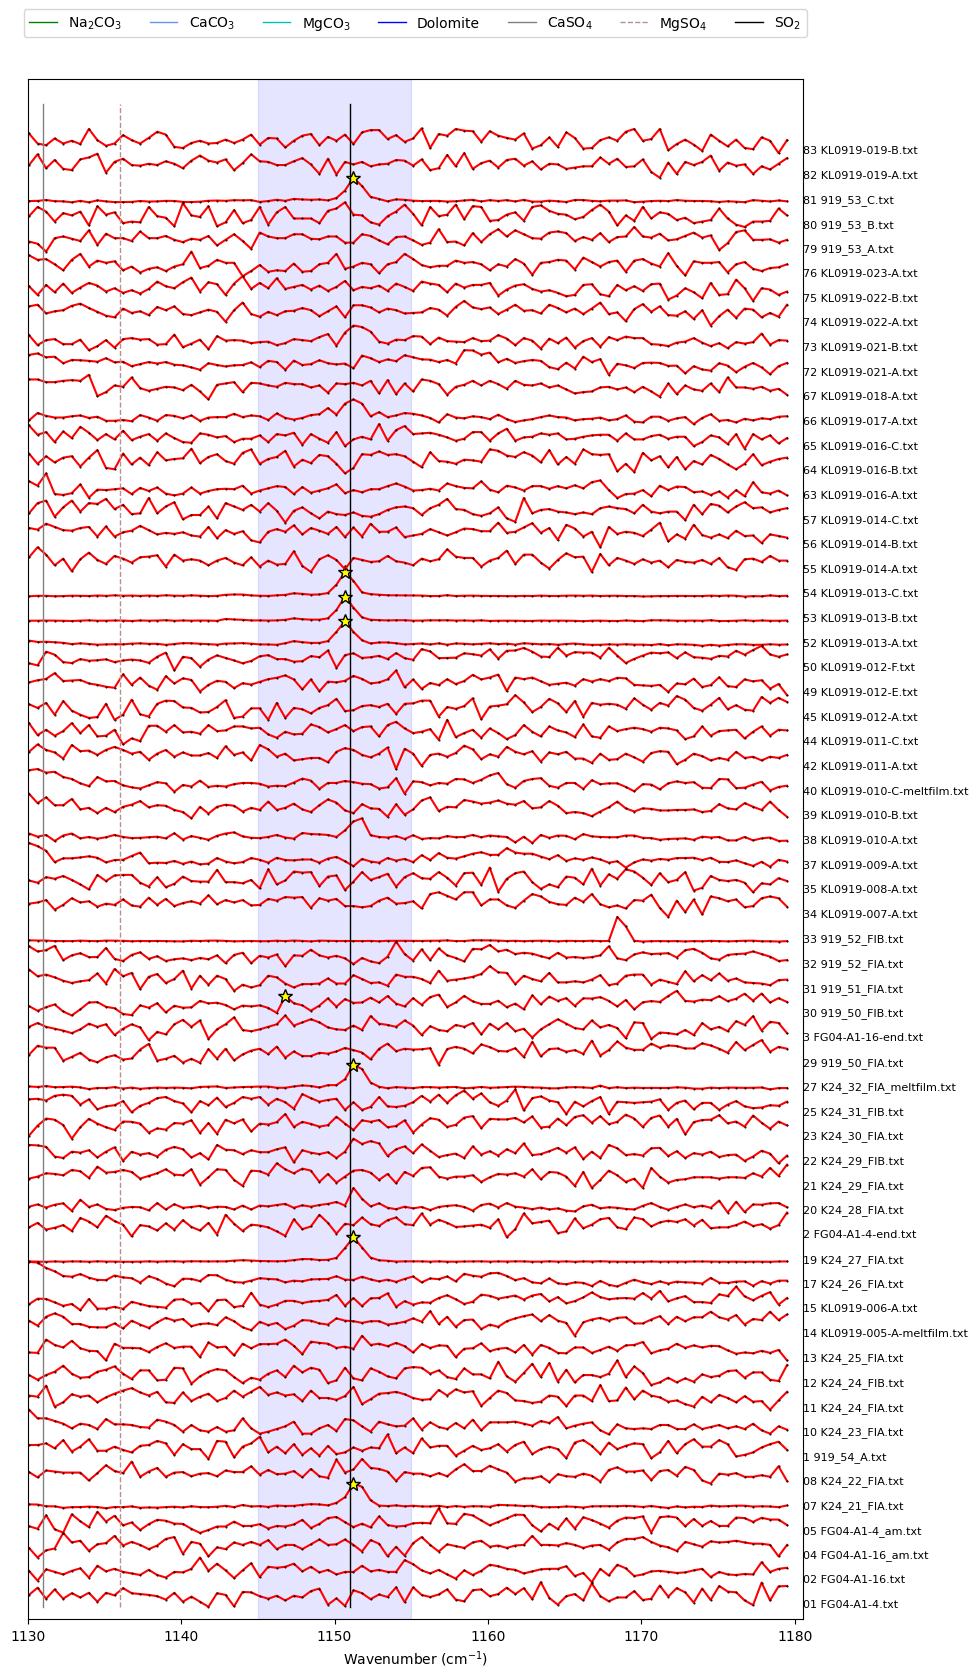

In [84]:
prominence_SO2=20
height_SO2=20
width_SO2=1
threshold_SO2=1

SO2_peaks_scipy, x_data_scipy, y_data_scipy, fig_scipy=pf.plot_secondary_peaks(
Diad_Files=Diad_Files, path=spectra_path, 
filetype=spectra_filetype, find_peaks_filter=True,  
xlim_peaks=[1145, 1155], xlim_plot=[1130, 1180], yscale=0.3,
prominence=prominence_SO2, height=height_SO2, width=width_SO2, threshold=threshold_SO2)

SO2_peaks=SO2_peaks_scipy

In [85]:
SO2_peaks

,pos,height,prom,file_names
0,NaN,NaN,NaN,01 FG04-A1-4.txt
1,NaN,NaN,NaN,02 FG04-A1-16.txt
2,NaN,NaN,NaN,04 FG04-A1-16_am.txt
3,NaN,NaN,NaN,05 FG04-A1-4_am.txt
4,1151.234085,828.25,109.250,07 K24_21_FIA.txt
5,NaN,NaN,NaN,08 K24_22_FIA.txt
6,NaN,NaN,NaN,1 919_54_A.txt
7,NaN,NaN,NaN,10 K24_23_FIA.txt
8,NaN,NaN,NaN,11 K24_24_FIA.txt
9,NaN,NaN,NaN,12 K24_24_FIB.txt


### Now filter out ones with no peaks, or low prominence before we loop through them

In [86]:
# Remove the ones where it didnt find SO2
SO2_notNa=np.isnan(SO2_peaks['pos'])
# Remove ones with a prominence less than this. 
prom_filt=10
SO2_filter=((SO2_peaks['prom']>10))&(~SO2_notNa)
print('Number kept with this filter:')
print(sum(SO2_filter))
print('Number discarded:')
print(sum(~SO2_filter&(~SO2_notNa)))
filenames_SO2=list(File_df['filename'].loc[SO2_filter])
print('filenames with SO2:')
print(filenames_SO2)

Number kept with this filter:
8
Number discarded:
0
filenames with SO2:
['07 K24_21_FIA.txt', '19 K24_27_FIA.txt', '27 K24_32_FIA_meltfilm.txt', '30 919_50_FIB.txt', '52 KL0919-013-A.txt', '53 KL0919-013-B.txt', '54 KL0919-013-C.txt', '81 919_53_C.txt']


### Choose a filename to test peak fits

In [87]:
if sum(SO2_filter)>0:
    filename=filenames_SO2[0]

### Set up configuration file for S peak fitting
- Here, we are using a spline to quantify the area down to the 92% of the peak height (int_cut_of=0.08), there are differen options you can use for this

generic_peak_config(name='SO2', lower_bck=[1110, 1130], upper_bck=[1190, 1200], model_name='PseudoVoigtModel', x_range_bck=20, N_poly_carb_bck=1, amplitude=1000, cent=1150, outlier_sigma=12, distance=10, prominence=5, width=6, threshold=0.1, height=100, exclude_range=None, return_other_params=False, N_peaks=1, int_cut_off=0.05)


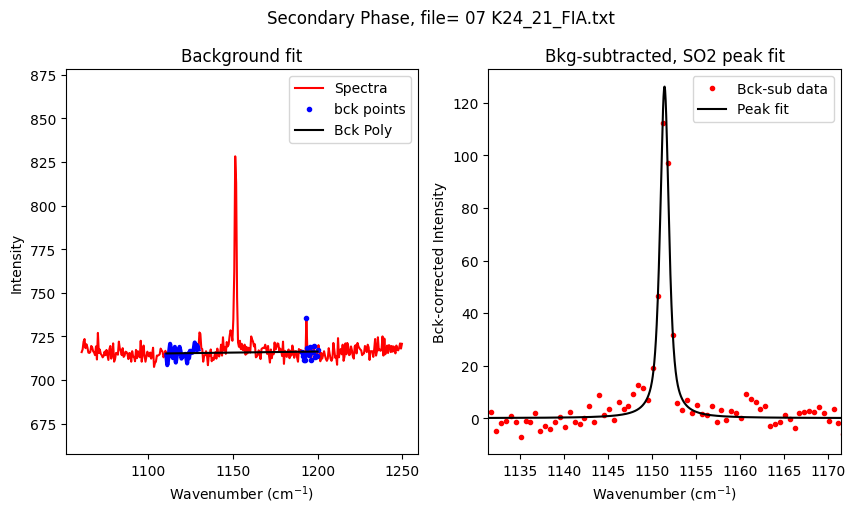

In [88]:
if sum(SO2_filter)>0:
    SO2_peak_config=pf.generic_peak_config(name='SO2', lower_bck=[1110, 1130],
    upper_bck=[1190, 1200], cent=1150, x_range_bck=20, N_peaks=1,   model_name='PseudoVoigtModel', int_cut_off=0.05)
    print(SO2_peak_config)

    SO2_peak_fit=pf.fit_generic_peak(config=SO2_peak_config, 
    path=spectra_path, filename=filename, filetype=spectra_filetype, 
     plot_figure=True)

## Now lets loop through files

100%|██████████| 8/8 [00:04<00:00,  1.87it/s]


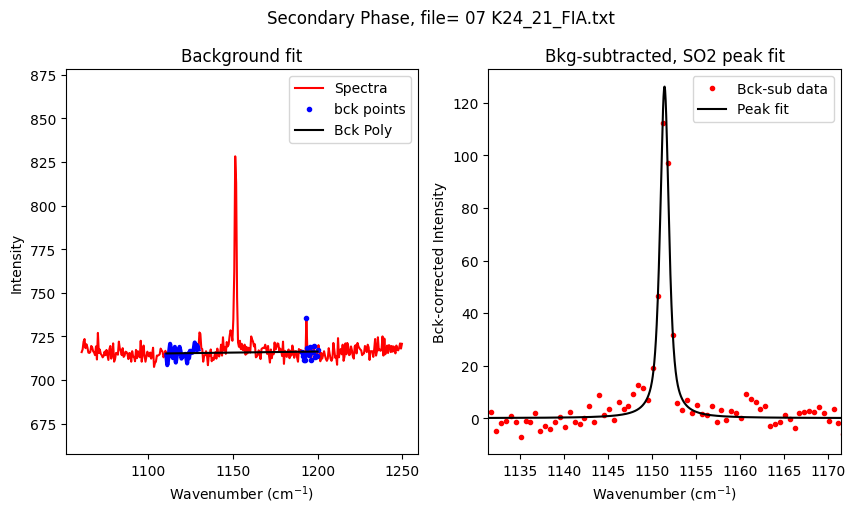

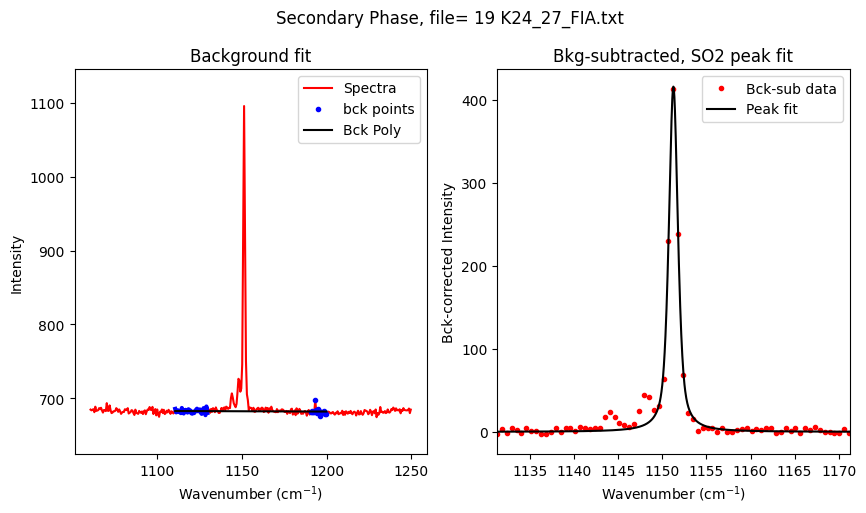

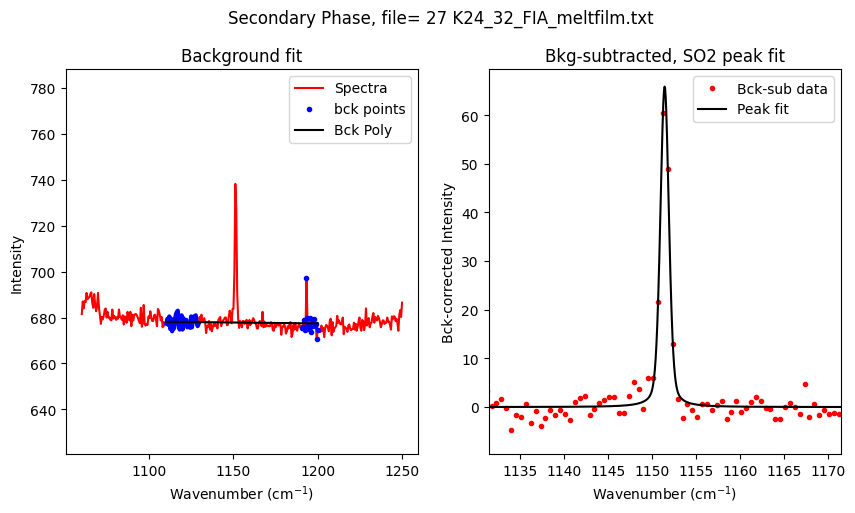

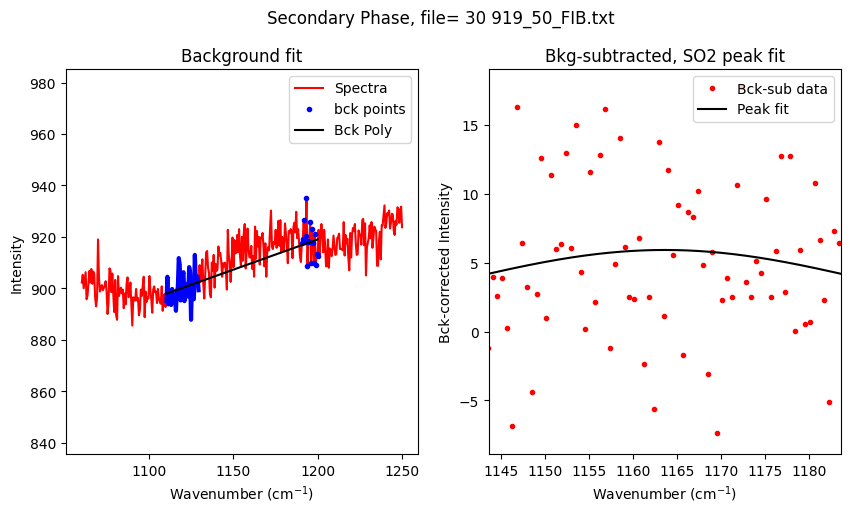

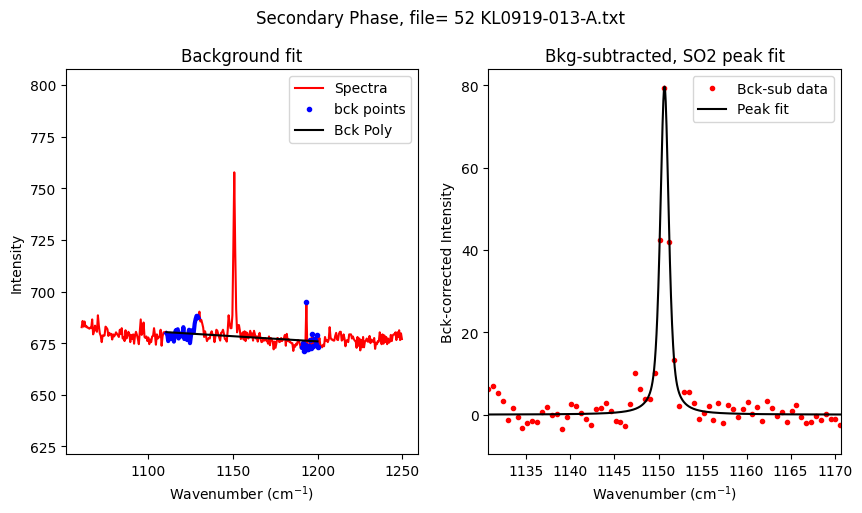

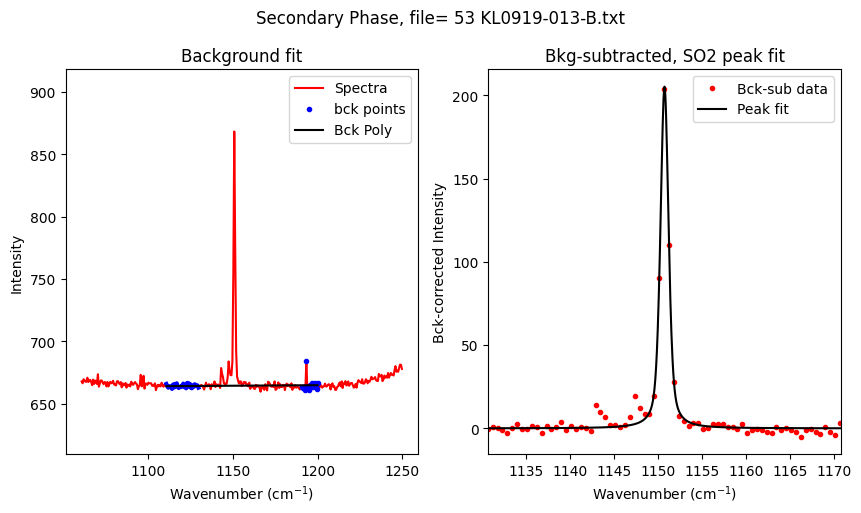

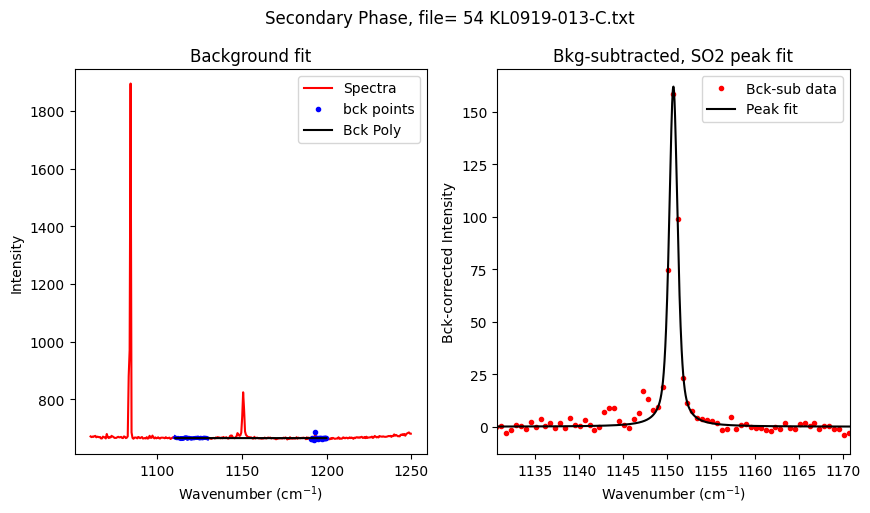

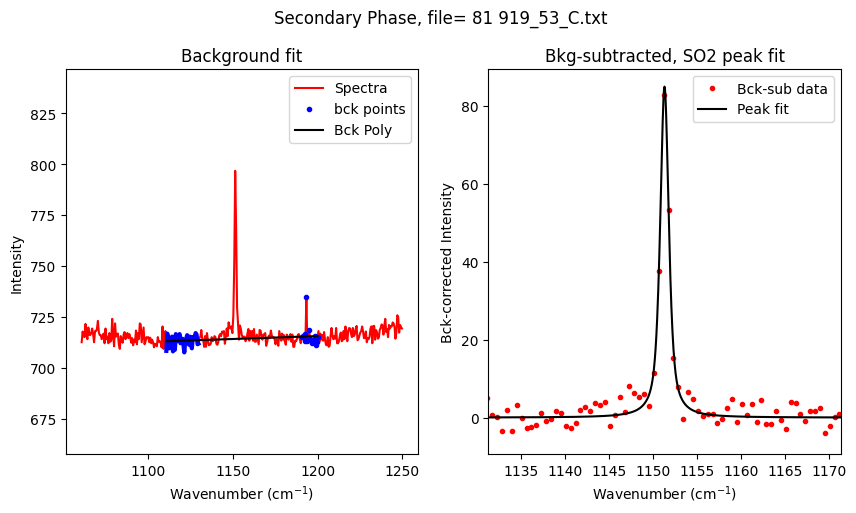

In [89]:
files_to_fit=filenames_SO2
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself

df_Merge_SO2 = pd.DataFrame([])

for i in tqdm(range(0, len(files_to_fit))): #
    
    ## Diad 1 fit
    filename=files_to_fit[i]

    SO2_peak_fit=pf.fit_generic_peak(config=SO2_peak_config, 
path=spectra_path, filename=filename, filetype=spectra_filetype,
 plot_figure=plot_figure)
 
    df_Merge_SO2 = pd.concat([df_Merge_SO2, SO2_peak_fit], axis=0)

In [90]:
df_Merge_SO2

,filename,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name
0,07 K24_21_FIA.txt,1151.436623,213.776794,126.222271,PseudoVoigtModel
0,19 K24_27_FIA.txt,1151.242610,697.928384,416.000887,PseudoVoigtModel
0,27 K24_32_FIA_meltfilm.txt,1151.421073,92.458679,65.861150,PseudoVoigtModel
0,30 919_50_FIB.txt,1163.555586,356.846626,5.911369,PseudoVoigtModel
0,52 KL0919-013-A.txt,1150.680751,126.082655,79.636164,PseudoVoigtModel
0,53 KL0919-013-B.txt,1150.723519,293.138435,205.171140,PseudoVoigtModel
0,54 KL0919-013-C.txt,1150.748636,253.487212,162.020790,PseudoVoigtModel
0,81 919_53_C.txt,1151.325570,139.510237,84.857980,PseudoVoigtModel


### Plot peak areas and peak heights

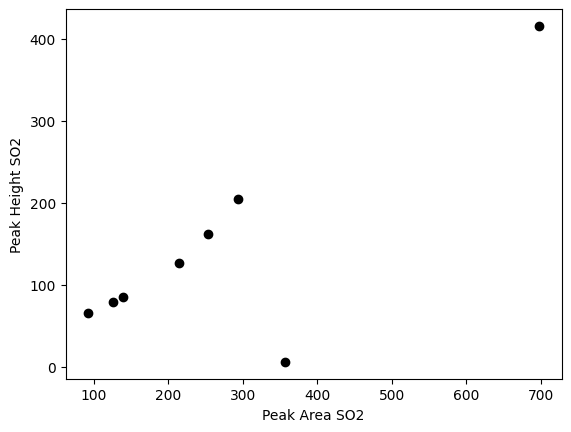

In [91]:
if sum(SO2_filter)>0:
    plt.plot(df_Merge_SO2['Peak_Area_SO2'], 
            df_Merge_SO2['Peak_Height_SO2'], 'ok')
    plt.xlabel('Peak Area SO2')
    plt.ylabel('Peak Height SO2')
    # plt.yscale('log')
# plt.xscale('log')

### Save this to excel

In [92]:
if sum(SO2_filter)>0:
    df_Merge_SO2.to_excel('SO2_Peak_fits.xlsx', index=False)

## Now do the same to ID any carbonate peaks

### Using scipy find peaks methods
- This method doesnt always work perfectly for broader carbonate peaks

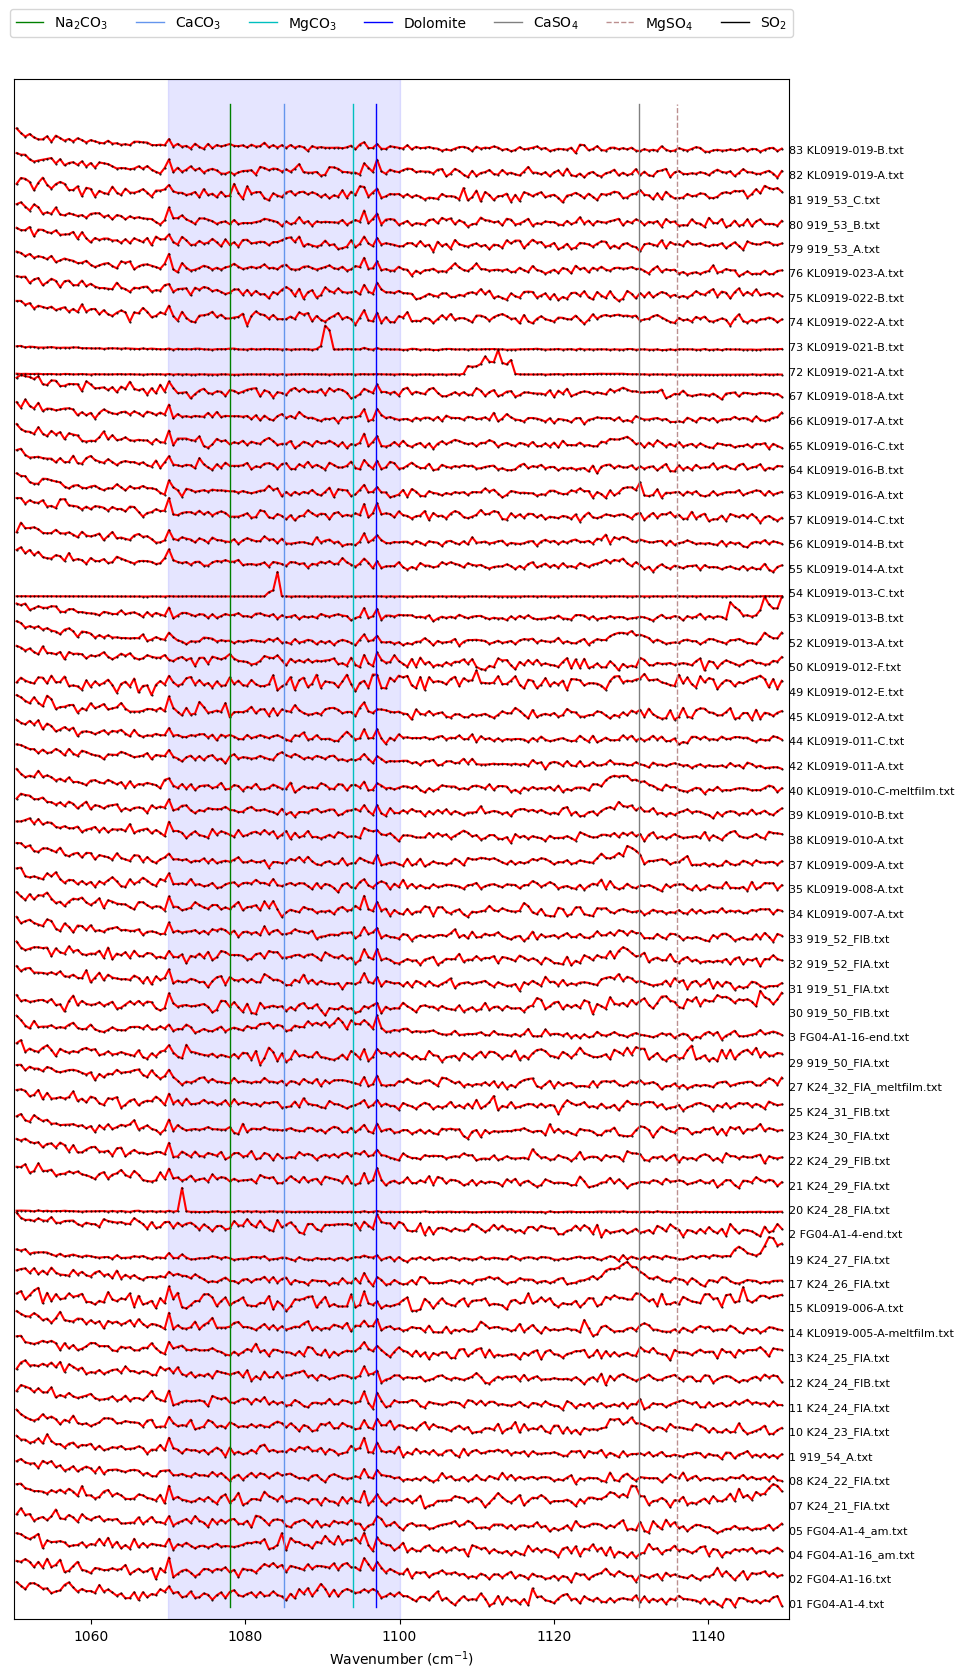

In [93]:

prominence_carb=30
height_carb=10
width_carb=3
threshold_carb=1

Carb_peaks_scipy, x_data_scipy, y_data_scipy, fig=pf.plot_secondary_peaks(
Diad_Files=Diad_Files, path=spectra_path, 
 filetype=spectra_filetype, find_peaks_filter=True,  
xlim_plot=[1050, 1150], xlim_peaks=[1070, 1100], yscale=0.3,
prominence=prominence_carb, height=height_carb, width=width_carb, threshold=threshold_carb)
Carb_peaks=Carb_peaks_scipy

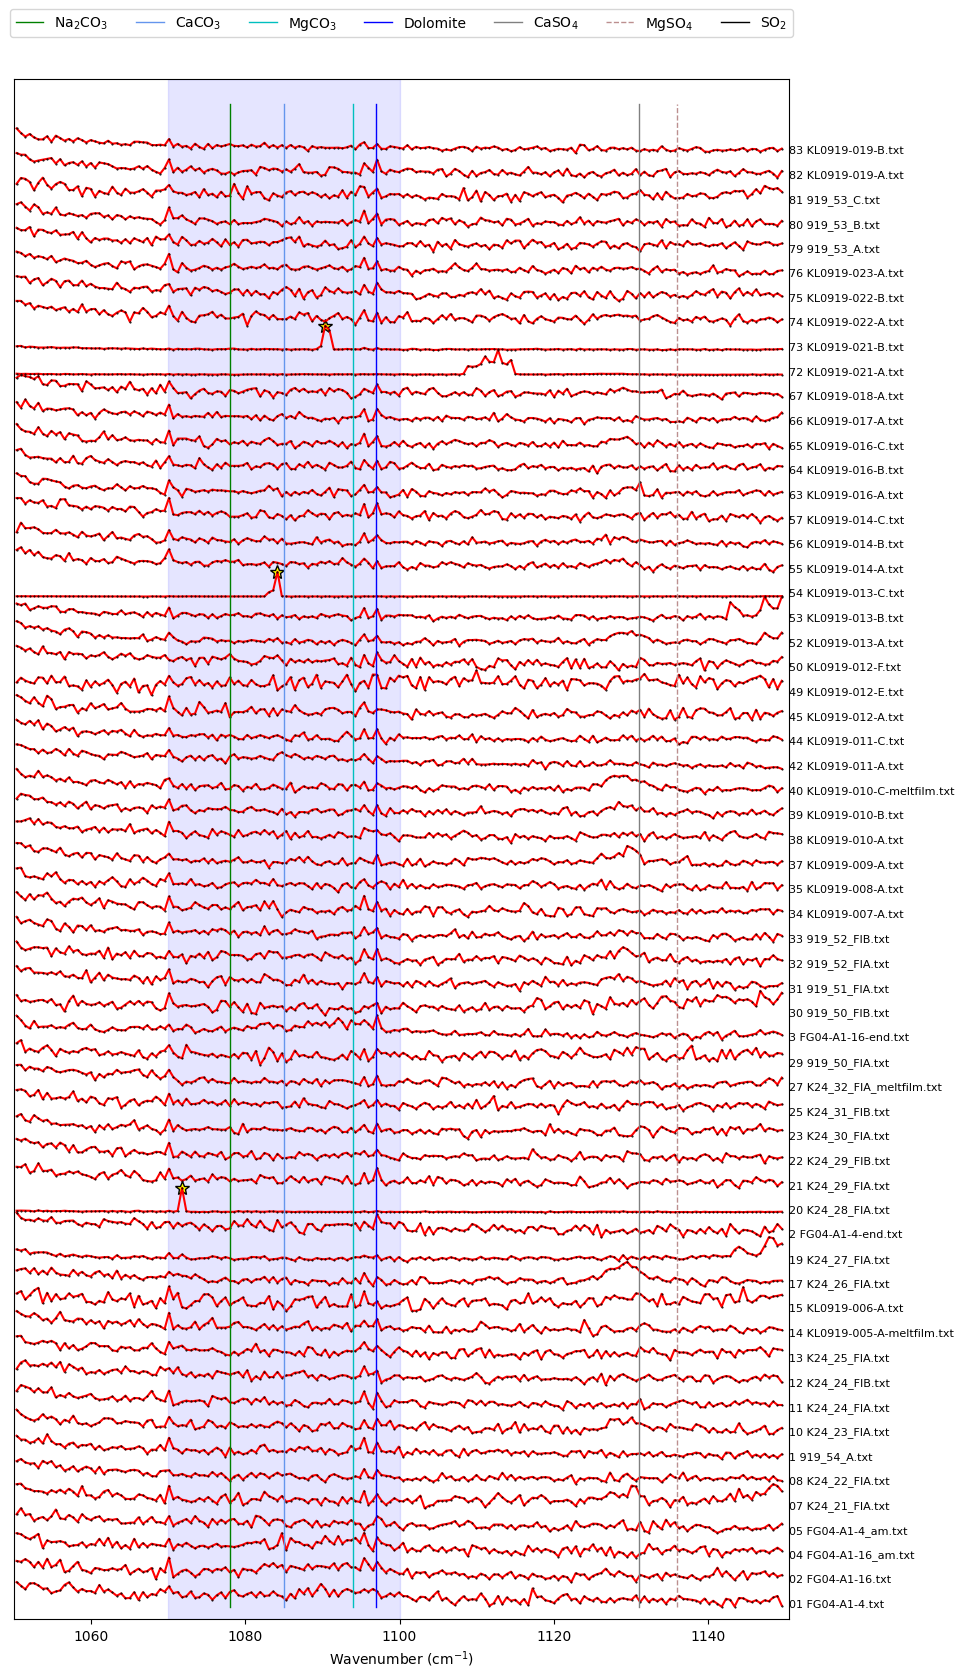

In [94]:

prominence_carb=30
height_carb=10
width_carb=1
threshold_carb=1

Carb_peaks_prom, x_data_prom, y_data_prom, fig=pf.plot_secondary_peaks(
Diad_Files=Diad_Files, path=spectra_path, 
 filetype=spectra_filetype, prominence_filter=True,  
xlim_plot=[1050, 1150], xlim_peaks=[1070, 1100], yscale=0.3,
prominence=prominence_carb, height=height_carb, width=width_carb, threshold=threshold_carb)

## Find ones with certain peak parameters to include

In [95]:
Carb_noNa=np.isnan(Carb_peaks['pos'])
prom_filter=30
Carb_filter=((Carb_peaks['prom']>prom_filter))&(~Carb_noNa)
print('Number kept with this filter:')
print(sum(Carb_filter))
print('Number discarded:')
print(sum(~Carb_filter&(~Carb_noNa)))
filenames_Carb=list(File_df['filename'].loc[Carb_filter])
print('filenames with carb:')
print(filenames_Carb)

Number kept with this filter:
0
Number discarded:
0
filenames with carb:
[]


### Fit one to tweak parameters

In [96]:
if sum(Carb_filter)>0:
    filename_carb=filenames_Carb[0]

    Carb_peak_config=pf.generic_peak_config(name='Carb', lower_bck=[1050, 1070],
    upper_bck=[1120, 1150], cent=1090, x_range_bck=50, N_poly_carb_bck=2, model_name='Spline')
    print(Carb_peak_config)

    Carb_peak_fit=pf.fit_generic_peak(config=Carb_peak_config, 
    path=spectra_path, filename=filename_carb, filetype=spectra_filetype,
     plot_figure=True)

### Loop over all carbonate files

In [97]:
files_to_fit=filenames_Carb
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself

df_Merge_Carb = pd.DataFrame([])

for i in tqdm(range(0, len(files_to_fit))): #
    
    ## Diad 1 fit
    filename=files_to_fit[i]

    Carb_peak_fit=pf.fit_generic_peak(config=Carb_peak_config, 
path=spectra_path, filename=filename, filetype=spectra_filetype,
 plot_figure=plot_figure)
 
    df_Merge_Carb = pd.concat([df_Merge_Carb, Carb_peak_fit], axis=0)

0it [00:00, ?it/s]


In [98]:
if sum(Carb_filter)>0:
    plt.plot(df_Merge_Carb['Peak_Area_Carb'], 
        df_Merge_Carb['Peak_Height_Carb'], 'ok')
    plt.xlabel('Peak Area Carb')
    plt.ylabel('Peak Height Carb')
# plt.yscale('log')
# plt.xscale('log')

## Save to excel

In [99]:
if sum(Carb_filter)>0:
    df_Merge_Carb.to_excel('Carb_Peak_fits.xlsx', index=False )

In [100]:
df_Merge_Carb

""
